<a href="https://www.kaggle.com/code/mhvasconcelos/an-lise-de-campos-vetoriais?scriptVersionId=182626944" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# Campos Vetoriais
- Um campo vetorial associa um vetor a cada ponto no espaço. Em um campo vetorial, cada ponto tem uma magnitude e uma direção associada ao vetor. Por exemplo, campo de velocidade, campo de força e campo magnético.
> Isso significa que em diferentes pontos do campo, os vetores podem apontar em direções diferentes e ter magnitudes diferentes. Ou seja, a grandeza e a direção do campo podem variar de um ponto para outro, diferente do campo escalar em que cada ponto recebe um valor numérico sem sentido e direção

- Podemos associar um campo vetorial com direções de ventos, tráfego de trânsito em uma metrópole, fluxo de um fluido, etc.





### Conceitos-chave utilizados:
#### **Numpy:**
- np.meshgrid:
> Gera uma grade de coordenadas a partir de vetores de coordenadas. Serão basicamente a origem dos nossos vetores, as posições de onde eles saem.
- np.tile (opcional, apenas se tivéssemos poucos dados)
> Essa função constrói um novo array repetindo um array existente ao longo de múltiplos eixos. Ou seja, utilizaremos para replicar vários vetores ao longo da nossa grade criada com o meshgrid, caso tívessemos poucos dados
- np.linspace
> Cria um espaçamento uniforme de valores. Utilizaremos para construir os posicionamentos dos vetores ao longo da grade

#### **Matplotlib:**
- plt.quiver: É usada para plotar um campo vetorial. Ela toma como argumentos as coordenadas dos pontos iniciais dos vetores (X, Y) e os componentes dos vetores (U, V).


### Exemplos de campo vetorial:
Criei alguns subplots (4) pra plotar 4 campos vetoriais diferentes só p/ tomarmos como base o funcionamento e a mecânica desses tais campos.

**1. Vamos simular um espaçamento que vai de - 2 a 2 com 20 valores entre eles**

In [2]:
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

**2. Vamos simular 4 campos vetoriais distintos que tem diferentes leis de formação dos vetores:**

In [3]:
campos = [
    (-Y, X),                           # Campo Vetorial 1
    (X**2 - Y**2, 2*X*Y),              # Campo Vetorial 2
    (np.cos(X), np.sin(Y)),            # Campo Vetorial 3
    (X, Y)             # Campo Vetorial 4
]

**3. Vamos criar subplots (4 gráficos, para os 4 campos) e em seguida iterar sobre eles e exibí-los usando o plt.quiver**

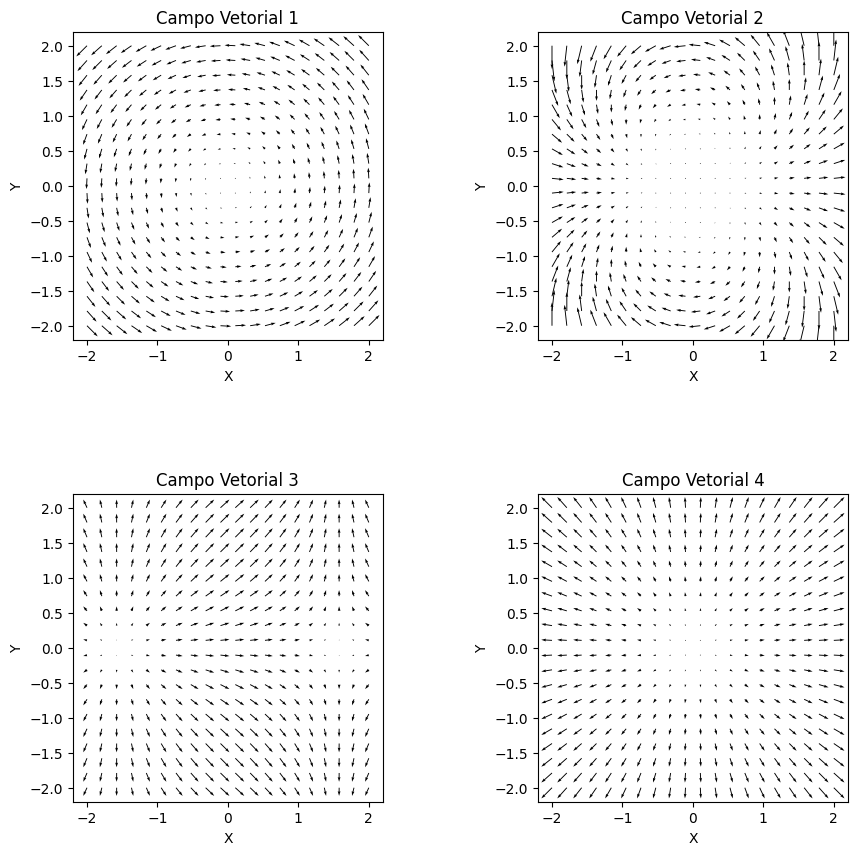

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Dá para iterar sobre os subplots usando "axs.flat"
for i, ax in enumerate(axs.flat):
    ax.quiver(X, Y, campos[i][0], campos[i][1])
    ax.set_title(f'Campo Vetorial {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Exibindo os gráficos
plt.show()

# Case Real
### Variáveis:
> Peguei essa base de dados sobre turbinas eólicas, que possuem as variáveis:
- Direção do vento (ângulo do vetor)
- Velocidade do vento (módulo do vetor)
- As outras variáveis podem ser descartadas por ora

 #### Suposições:
 > Como não temos alguns dados a mais, vamos considerar algumas coisas:
 - Temos variáveis que indicam o comportamento do vento, mas não indicam sua origem, ou seja, a posição das turbinas eólicas. Para isso, vamos usar o meshgrid p/ criar um grid organizado, que seria o local onde as turbinas estariam supostamente posicionadas. Afinal, as turbinas tem um posicionamento similar a uma configuração alinhada
 - Para mostrar o gráfico do campo, vamos considerar apenas as 100 primeiras linhas, ou seja, 100 turbinas.


In [5]:
df = pd.read_csv('/kaggle/input/wind-turbine-scada-dataset/T1.csv')
df = df[0:100]
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      100 non-null    object 
 1   LV ActivePower (kW)            100 non-null    float64
 2   Wind Speed (m/s)               100 non-null    float64
 3   Theoretical_Power_Curve (KWh)  100 non-null    float64
 4   Wind Direction (°)             100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


### 1 - Renomeando as colunas e apagando as colunas desnecessárias

In [7]:
df.rename(columns={'Wind Speed (m/s)': 'VV', 'Wind Direction (°)': 'Direcao'}, inplace=True)
df.drop(['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'Date/Time'], axis=1, inplace=True)
df.head()

,VV,Direcao
0,5.311336,259.994904
1,5.672167,268.641113
2,5.216037,272.564789
3,5.659674,271.258087
4,5.577941,265.674286


###  2 - Convertendo a coluna "Direção do vento" de graus para coordenadas cartesianas.
> Lembrar de usar np.deg2rad que converte, para o cálculo, graus para radianos:

In [8]:
df['X'] = df['VV'] * np.cos(np.deg2rad(df['Direcao']))
df['Y'] = df['VV'] * np.sin(np.deg2rad(df['Direcao']))
df.head()

,VV,Direcao,X,Y
0,5.311336,259.994904,-0.922769,-5.230563
1,5.672167,268.641113,-0.134514,-5.670572
2,5.216037,272.564789,0.233413,-5.210812
3,5.659674,271.258087,0.124264,-5.658310
4,5.577941,265.674286,-0.420723,-5.562052


## **Representação no campo vetorial**
> Agora podemos representar os vetores num grid, usando o módulo meshgrid do Numpy, que seria a área em que nossos vetores estarão presentes

> Isso porque não nos foi dado a lei de formação dos vetores e as posições das turbinas eólicas, apenas os vetores em si. Por isso, vamos arbitrar as posições das turbinas e os vetores que representam os ventos

1. **Definimos as componentes X e Y**
> Para não congestionar a visualização, vamos plotar os 100 primeiros vetores (100 primeiras linhas do dataset)

In [9]:
componentes_x = df['X']
componentes_y = df['Y']

2. **Criamos o grid para representar os pontos de origem**
> Como não temos as posições reais, o jeito é arbitrar alguns valores usando o np.linspace e o np.meshgrid

  > O grid_size é definido como 10, pois 10 * 10 = 100, que é nosso número de vetores pré-estabelecidos para exibição

In [10]:
grid_size = 10
x = np.linspace(-10, 10, grid_size)
y = np.linspace(-10, 10, grid_size)
posicoes_x, posicoes_y = np.meshgrid(x, y)

3. **Visualizar o campo**
> Usamos quiver do matplotlib para desenhar os vetores nas posições do grid

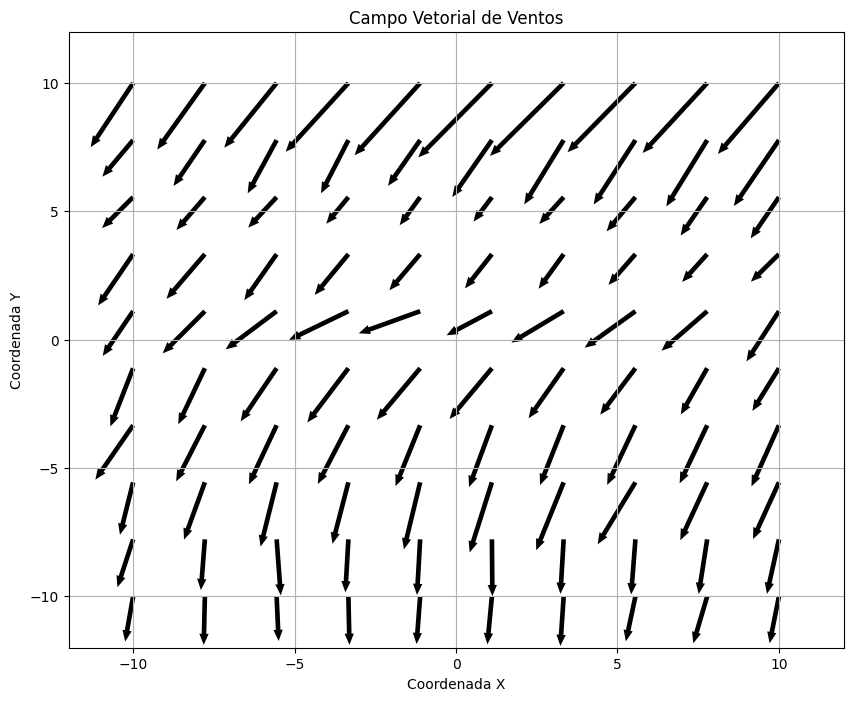

In [11]:
# Criar o gráfico de campo vetorial
plt.figure(figsize=(10, 8))
plt.quiver(posicoes_x,
           posicoes_y,
           componentes_x,
           componentes_y,
           scale_units='xy',
           headaxislength=2.4,
           headlength=2.4,
           scale=3,
           headwidth = 2)

plt.xlim(-12,12)
plt.ylim(-12,12)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Campo Vetorial de Ventos')
plt.grid()
plt.show()


## Conclusão:
> Num Grid de 100 turbinas eólicas, pegando as 100 primeiras do dataset, temos essa configuração em 2D

# Campo Vetorial em 3D
- O mecanismo é basicamente o mesmo, apenas generalizaremos para uma dimensão z a mais.
- Mas para encontrar componente 3, precisaremos modificar um pouco a conversão (Polar -> Cartesiano)


**1. Precisamos agora também do ângulo em relação ao eixo z, que chamamos de DirecaoZ**

In [12]:
df3d = df.drop(['X', 'Y'], axis=1)
df3d['DirecaoZ'] = (np.pi)/2 - df['Direcao']
df3d

,VV,Direcao,DirecaoZ
0,5.311336,259.994904,-258.424107
1,5.672167,268.641113,-267.070317
2,5.216037,272.564789,-270.993992
3,5.659674,271.258087,-269.687291
4,5.577941,265.674286,-264.103490
...,...,...,...
95,10.772420,225.276398,-223.705601
96,10.647520,224.680603,-223.109807
97,9.982661,225.519501,-223.948704
98,9.874386,227.273804,-225.703007


**2. Para definir as coordenadas, usamos as fórmulas abaixo, que são um pouquinho mais complexas do que as fórmulas p/ coordenadas bidimensionais**

In [13]:
df3d['X'] = df3d['VV'] * np.sin(np.deg2rad(df3d['DirecaoZ']) * np.cos(np.deg2rad(df3d['Direcao'])))
df3d['Y'] = df3d['VV'] * np.sin(np.deg2rad(df3d['DirecaoZ']) * np.sin(np.deg2rad(df3d['Direcao'])))
df3d['Z'] = df3d['VV'] * np.cos(np.deg2rad(df3d['DirecaoZ']))
df3d.head()

,VV,Direcao,DirecaoZ,X,Y,Z
0,5.311336,259.994904,-258.424107,3.748958,-5.118018,-1.065803
1,5.672167,268.641113,-267.070317,0.625730,-5.664368,-0.289906
2,5.216037,272.564789,-270.993992,-1.095757,-5.215622,0.090486
3,5.659674,271.258087,-269.687291,-0.583861,-5.659551,-0.030889
4,5.577941,265.674286,-264.103490,1.900479,-5.540426,-0.573033


**3. Os próximos passos são similares ao caso 2D. Vamos definir um grid de 5**

In [14]:
comp_X, comp_Y, comp_Z = df3d['X'][0:100], df3d['Y'][0:100], df3d['Z'][0:100]

In [15]:
grid_size = 5
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
z = np.linspace(0, 10, grid_size)
pos_x, pos_y, pos_z = np.meshgrid(x, y, z)

pos_x = pos_x.flatten()[:100]
pos_y = pos_y.flatten()[:100]
pos_z = pos_z.flatten()[:100]



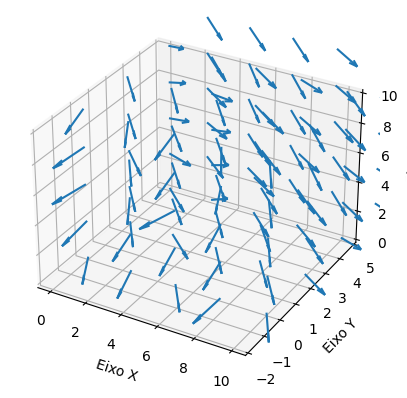

In [16]:
ax = plt.figure().add_subplot(projection='3d')

ax.quiver(pos_x, pos_y ,pos_z, comp_X, comp_Y, comp_Z, length = 1.6, normalize=True)
# Adicionar rótulos aos eixos
plt.ylim(-2,5)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

plt.show()

## Conclusão:
> Note que a configuração xy do grid 3D é similar à configuração xy do grid 2D. Só que agora temos uma dimensão a mais. É como se o grid linear das turbinas em 2D ( o que faz até mais sentido dentro do contexto abordado) fosse mais informativa em 3D, que nos informa o quanto os ventos se moveram pra baixo e para cima.